## **1.Import the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


2.Data loading & Understanding

In [2]:
df=pd.read_csv('C:/Users/brijm/OneDrive/Documents/ML project Autism/final-dataset.csv')

Initial Inspection


In [3]:
df.shape


(904, 22)

In [4]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
899,900,0,1,1,1,0,1,1,0,1,...,f,Middle Eastern,no,no,Anguilla,yes,6.0,12-15 years,Parent,NO
900,901,1,0,1,0,0,0,0,1,0,...,m,Asian,no,no,India,no,4.0,12-15 years,Parent,NO
901,902,1,0,0,1,1,1,1,1,1,...,f,White-European,no,no,United Kingdom,no,8.0,12-16 years,Self,YES
902,903,1,1,0,1,1,0,0,0,1,...,f,White-European,no,no,United Kingdom,no,6.0,12-16 years,Self,NO
903,904,1,0,1,0,0,1,1,1,1,...,m,Asian,no,no,India,no,6.0,12-16 years,Parent,NO


In [6]:
#display all column of dataframe
pd.set_option('display.max_columns',None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               904 non-null    int64  
 1   A1_Score         904 non-null    int64  
 2   A2_Score         904 non-null    int64  
 3   A3_Score         904 non-null    int64  
 4   A4_Score         904 non-null    int64  
 5   A5_Score         904 non-null    int64  
 6   A6_Score         904 non-null    int64  
 7   A7_Score         904 non-null    int64  
 8   A8_Score         904 non-null    int64  
 9   A9_Score         904 non-null    int64  
 10  A10_Score        904 non-null    int64  
 11  age              904 non-null    float64
 12  gender           904 non-null    object 
 13  ethnicity        904 non-null    object 
 14  jaundice         904 non-null    object 
 15  austim           904 non-null    object 
 16  contry_of_res    904 non-null    object 
 17  used_app_before 

In [8]:
df["age"]=df["age"].astype(int)

In [9]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(f'{col}:{df[col].unique()}')
    print("-"*50)

A1_Score:[1 0]
--------------------------------------------------
A2_Score:[0 1]
--------------------------------------------------
A3_Score:[1 0]
--------------------------------------------------
A4_Score:[0 1]
--------------------------------------------------
A5_Score:[1 0]
--------------------------------------------------
A6_Score:[0 1]
--------------------------------------------------
A7_Score:[1 0]
--------------------------------------------------
A8_Score:[0 1]
--------------------------------------------------
A9_Score:[1 0]
--------------------------------------------------
A10_Score:[1 0]
--------------------------------------------------
gender:['f' 'm']
--------------------------------------------------
ethnicity:['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice:['no' 'yes']
--------------------------------------------------
austim

In [11]:
#dropping ID & age_desc column
df=df.drop(columns=["ID"])

In [12]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [13]:
df.rename(columns={'contry_of_res': 'country_of_res'}, inplace=True)

In [14]:
df['country_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh', 'Albania', 'Bahrain', 'Croatia',
       'Indonesia', 'Greenland', 'Comoros', 'Portugal', 'Finland',
       'Norway', 'Anguilla'], dtype=object)

In [15]:
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China",
    "Greenland": "Denmark",
    "Aruba": "Netherlands",
    "Anguilla": "United Kingdom",
    "USA": "United States",
    "UAE": "United Arab Emirates",
    "south africa": "South Africa"  # Fix capitalization
}

# Replace incorrect country names
df['country_of_res'] = df['country_of_res'].replace(mapping)

# Standardize capitalization (Title Case)
df['country_of_res'] = df['country_of_res'].str.title()


In [16]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Sri Lanka',
       'Russia', 'Bolivia', 'Azerbaijan', 'Armenia', 'Serbia', 'Ethiopia',
       'Sweden', 'Iceland', 'China', 'Angola', 'Germany', 'Spain',
       'Tonga', 'Pakistan', 'Iran', 'Argentina', 'Japan', 'Mexico',
       'Nicaragua', 'Sierra Leone', 'Czech Republic', 'Niger', 'Romania',
       'Cyprus', 'Belgium', 'Burundi', 'Bangladesh', 'Albania', 'Bahrain',
       'Croatia', 'Indonesia', 'Denmark', 'Comoros', 'Portugal',
       'Finland', 'Norway'], dtype=object)

In [17]:
df['Class/ASD'] = df['Class/ASD'].replace({'YES': 1, 'NO': 0})

In [18]:
df["Class/ASD"] = df["Class/ASD"].astype(int)

In [19]:
df["Class/ASD"].value_counts()

Class/ASD
0    680
1    224
Name: count, dtype: int64

**Insights:**

1.missing values in ethnicity & relation

2.fixed country names

3.identified class imbalance in the target column

3.Exploratory Data analysis(EDA)

In [20]:
df.shape

(904, 21)

In [21]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [22]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.579646,0.530973,0.473451,0.448009,0.435841,0.357301,0.411504,0.521018,0.528761,0.621681,26.372788,8.328366,0.247788
std,0.493889,0.499316,0.499571,0.497565,0.496141,0.479470,0.492379,0.499835,0.499448,0.485236,15.991463,4.619565,0.431967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.311872,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,22.000000,9.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.250000,12.245695,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [23]:
df['age_desc'] = df['age_desc'].replace({'12-15 years': '12-16 years'})

In [24]:
df["age_desc"]

0      18 and more
1      18 and more
2      18 and more
3      18 and more
4      18 and more
          ...     
899    12-16 years
900    12-16 years
901    12-16 years
902    12-16 years
903    12-16 years
Name: age_desc, Length: 904, dtype: object

Univarient Analysis

Numerical Columns:
- age
- result

In [25]:
#set the desired theme
sns.set_theme(style="darkgrid")

Distribution plots

Mean Age:26.37278761061947
Median Age:22.0


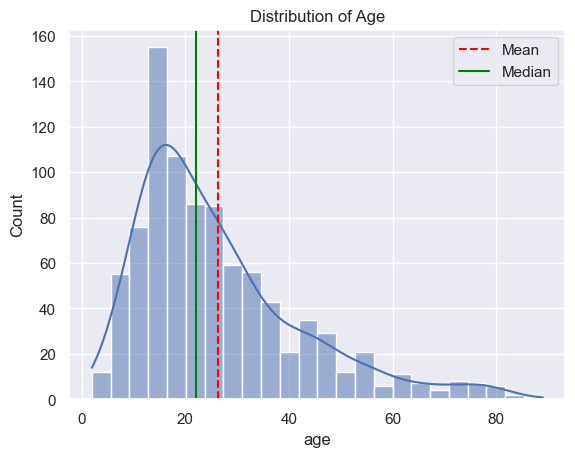

In [26]:
#histogram for "age"

sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")


#find the mean and median
mean_age=df["age"].mean()
median_age=df["age"].median()
print(f"Mean Age:{mean_age}")
print(f"Median Age:{median_age}")

#add vertical lines for mean and median
plt.axvline(mean_age,color="red",linestyle="--",label="Mean")
plt.axvline(median_age,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

Mean result:8.328365580974557
Median result:9.0


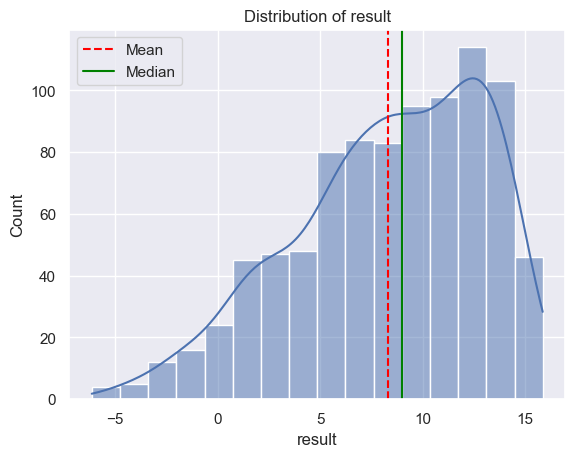

In [27]:
#histogram for "result"

sns.histplot(df["result"],kde=True)
plt.title("Distribution of result")


#find the mean and median
mean_result=df["result"].mean()
median_result=df["result"].median()
print(f"Mean result:{mean_result}")
print(f"Median result:{median_result}")

#add vertical lines for mean and median
plt.axvline(mean_result,color="red",linestyle="--",label="Mean")
plt.axvline(median_result,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

**Box plots for identifying outliers in the numerical columns**

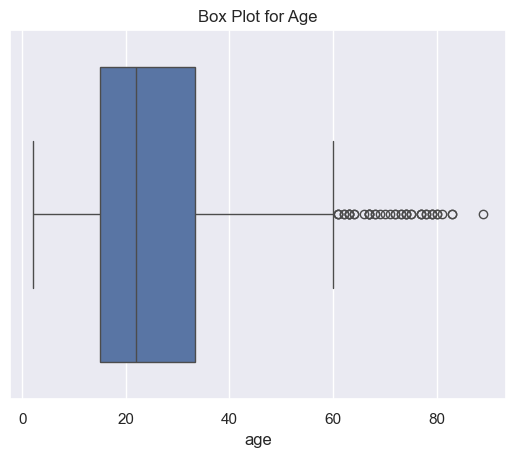

In [28]:
#box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("age")
plt.show()

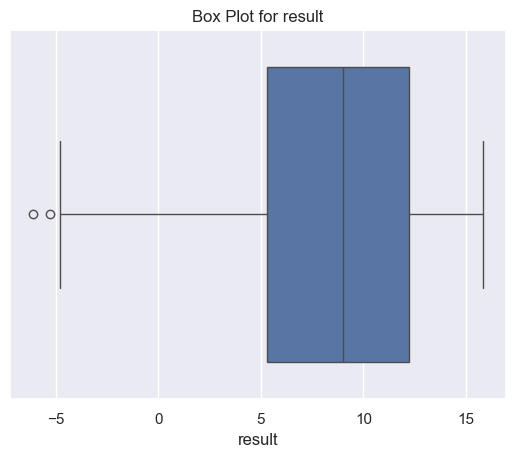

In [29]:
#box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [30]:
# count the outlier using IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]
print(f"Number of outliers in age column:{len(age_outliers)}")

Number of outliers in age column:44


In [31]:
# count the outlier using IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]
print(f"Number of outliers in result column:{len(result_outliers)}")

Number of outliers in result column:2


Univariate analysis of categorical columns

In [32]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

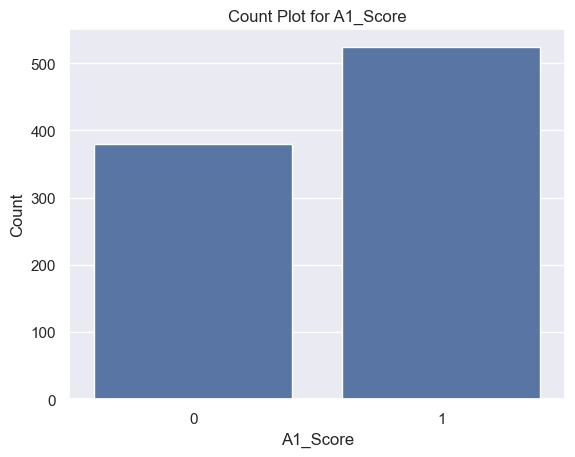

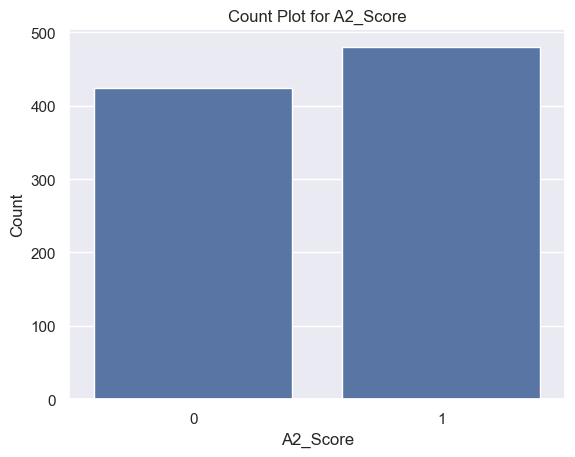

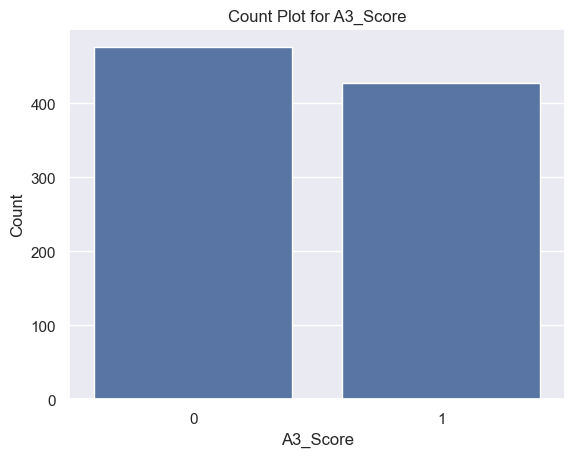

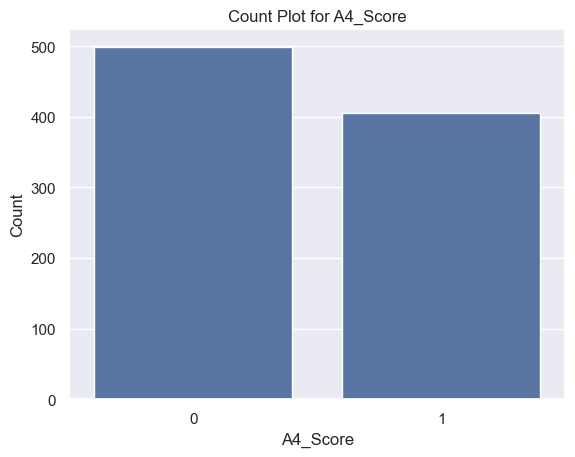

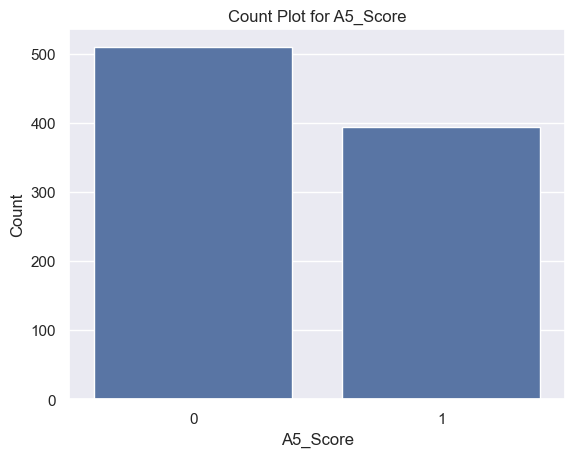

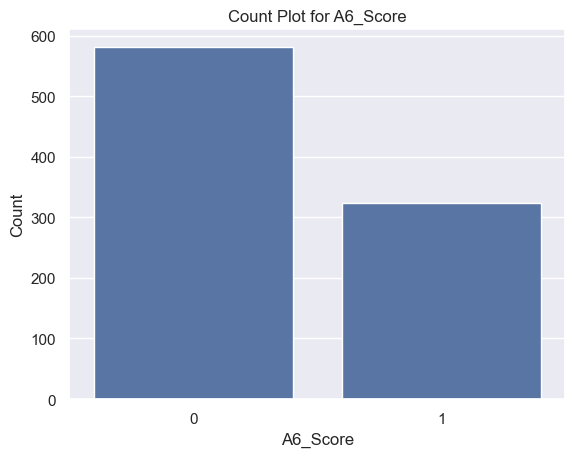

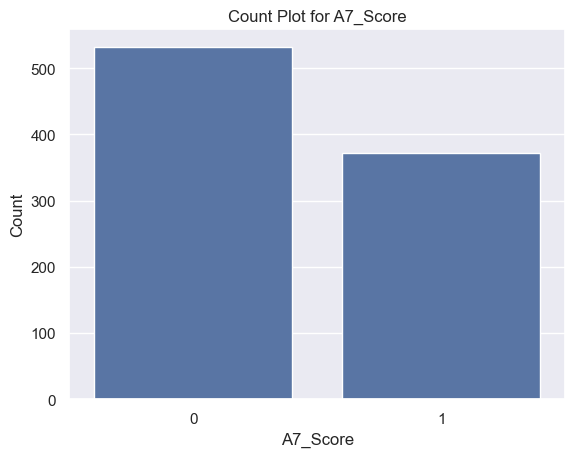

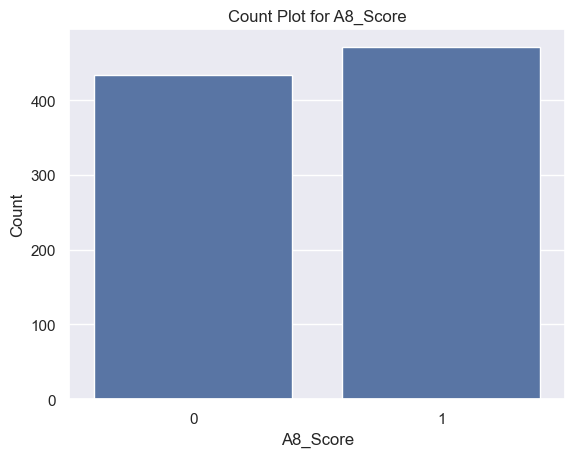

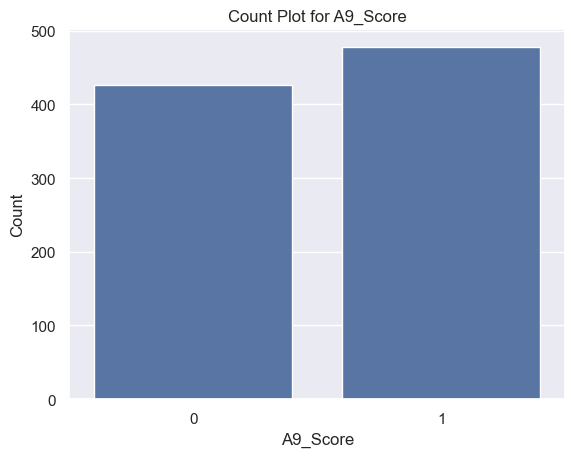

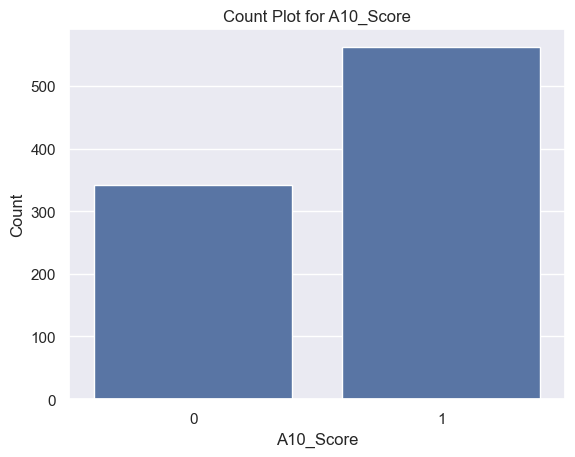

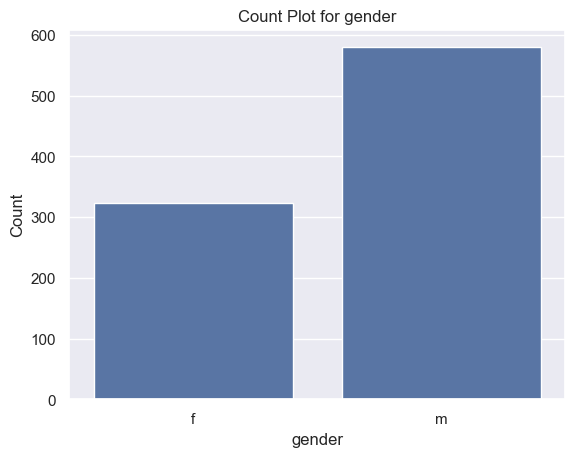

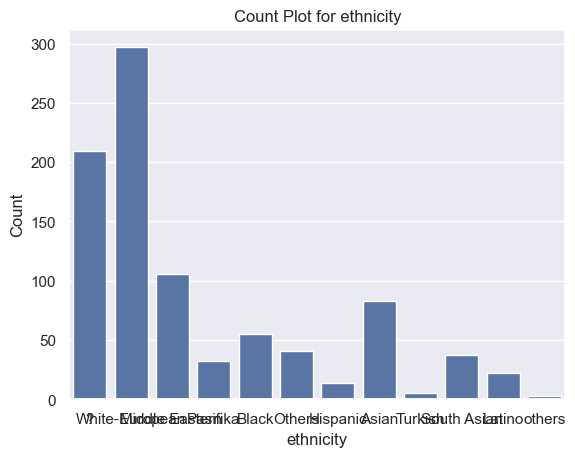

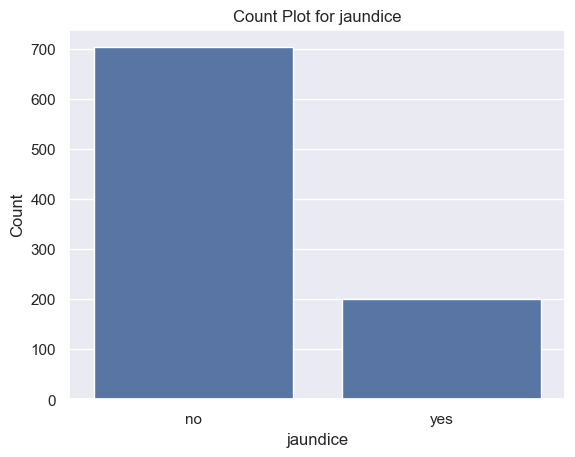

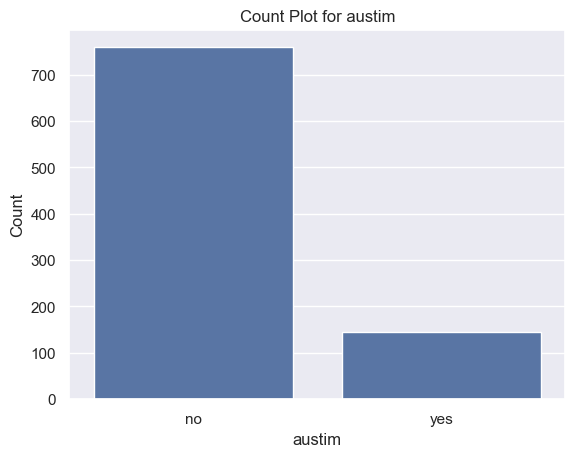

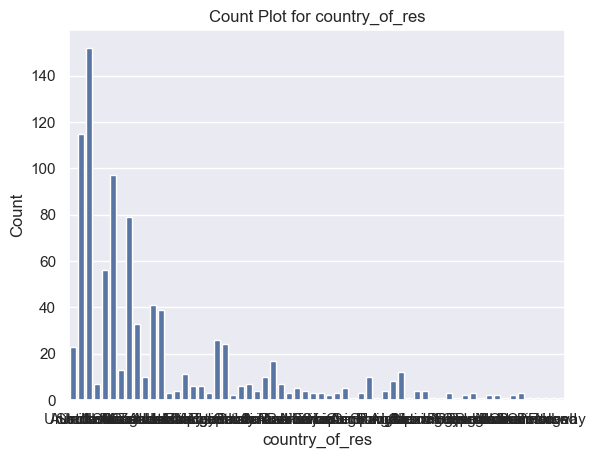

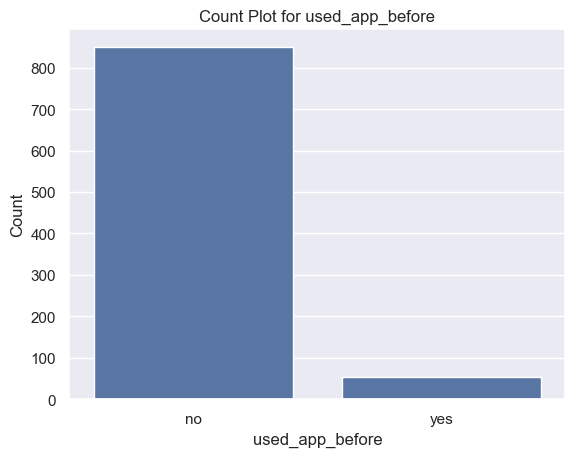

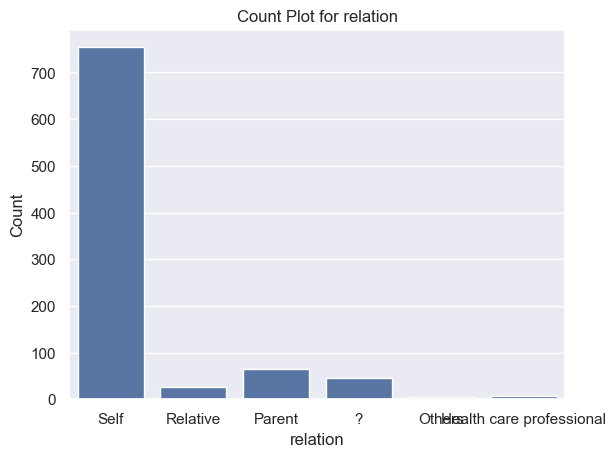

In [33]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before', 'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

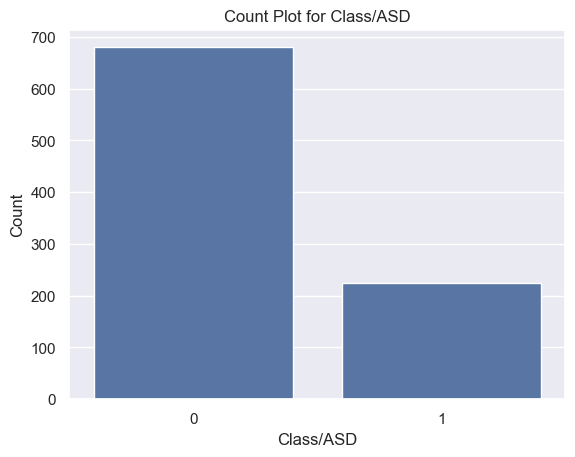

In [34]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

handle missing values in the ethnicity and relation column

In [35]:
df["ethnicity"]=df["ethnicity"].replace({"?":"Others","others":"Others"})

In [36]:
df["relation"]=df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others"
     }
    )

In [37]:
df["relation"].unique()
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [38]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,18 and more,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,18 and more,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,18 and more,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,18 and more,Self,0


Label Encoding

In [39]:
# identify column with object data type
object_columns=df.select_dtypes(include=["object"]).columns

In [40]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'used_app_before', 'age_desc', 'relation'],
      dtype='object')


In [41]:
#initialize a dictionary to store the encoders
encoders={}
#apply label encoding and store the encoders
for col in object_columns:
  encoder=LabelEncoder()
  df[col]=encoder.fit_transform(df[col])
  encoders[col]=encoder #saving the encoder for this column

  #save the encoder as a pickle file
  with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [42]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'age_desc': LabelEncoder(),
 'relation': LabelEncoder()}

In [43]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,28,0,2.255185,1,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,60,0,14.851484,1,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,60,0,2.276617,1,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,52,0,-4.777286,1,1,0


Bivariate Analysis

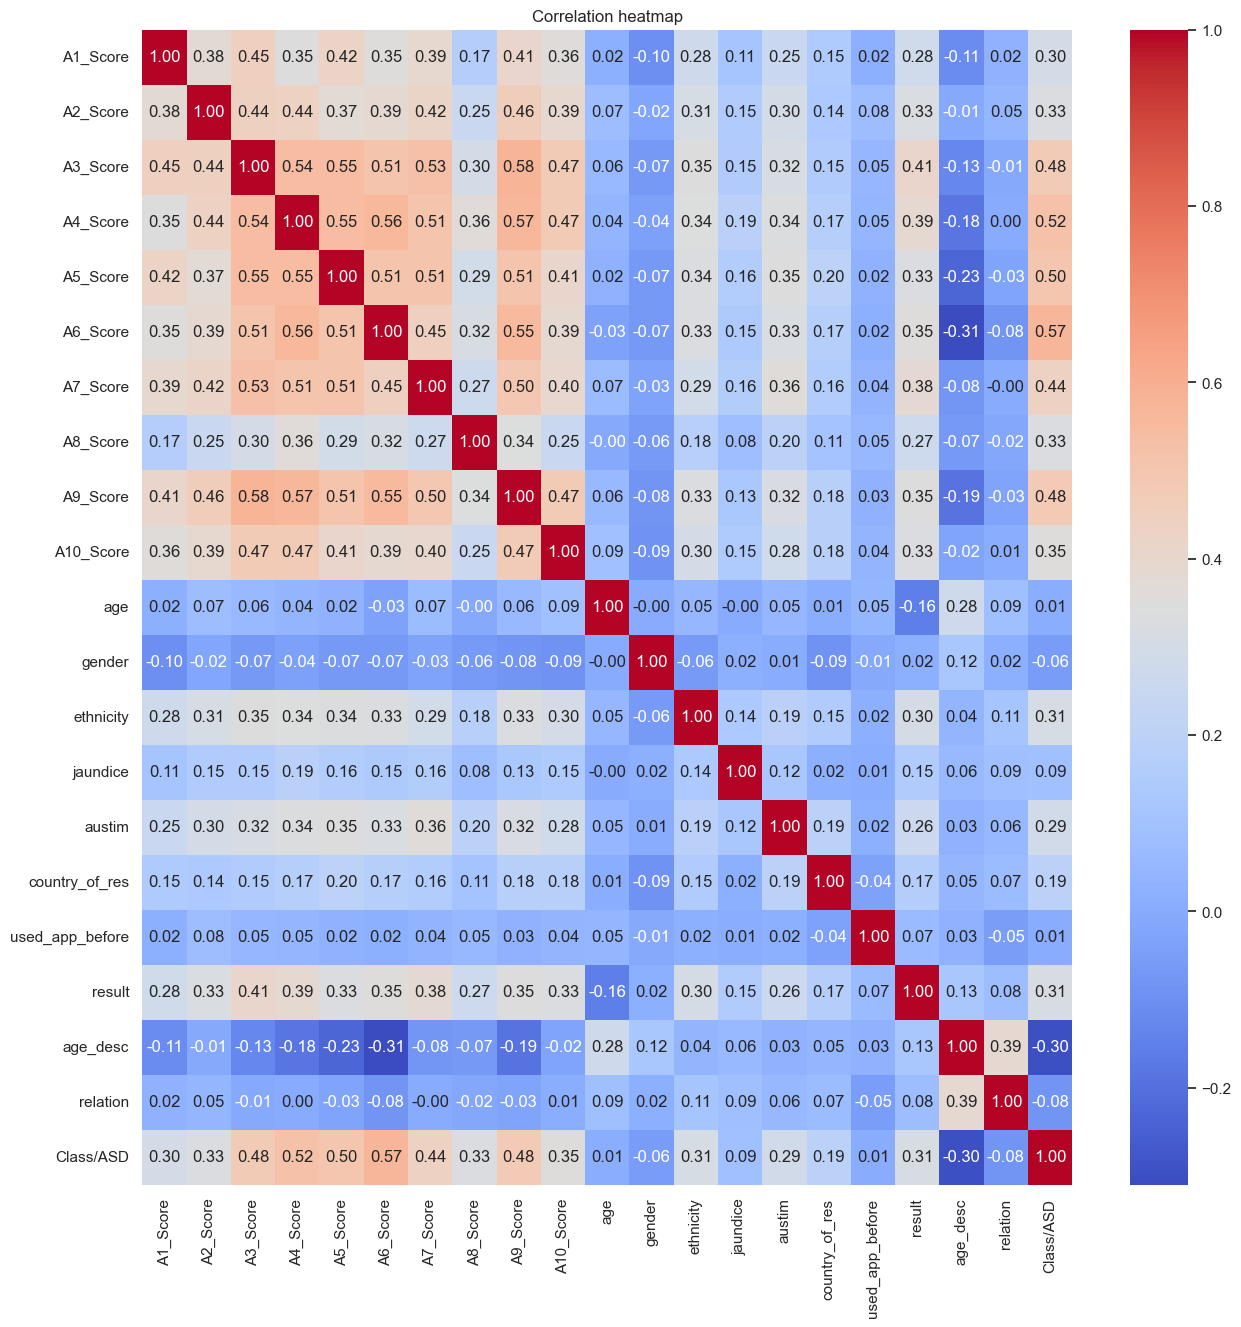

In [44]:
# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insight for EDA**
- There are few outliers in the numerical columns(age,rseult)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed lable encoding and saved the encoders

**4. Data preprocessing**

Handling the outlier

In [45]:
# function to replace the outliers with median
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR =Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  median=df[column].median()

  # replace the outlier with median value
  df[column]=df[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)

  return df


In [46]:
# replace the outlier in the age column
df=replace_outliers_with_median(df,"age")

# replace the outlier in the result column
df=replace_outliers_with_median(df,"result")

In [47]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,28,0,2.255185,1,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,60,0,14.851484,1,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,60,0,2.276617,1,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,52,0,-4.777286,1,1,0


In [48]:
df.shape

(904, 21)

Train Test Split

In [49]:
x =df.drop(columns=["Class/ASD"])

y=df["Class/ASD"]

In [50]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
899         0         1         1         1         0         1         1   
900         1         0         1         0         0         0         0   
901         1         0         0         1         1         1         1   
902         1         1         0         1         1         0         0   
903         1         0         1         0         0         1         1   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [51]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
899    0
900    0
901    1
902    0
903    0
Name: Class/ASD, Length: 904, dtype: int64


In [52]:
X_train ,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [53]:
print(y_train.shape)
print(y_test.shape)

(723,)
(181,)


In [54]:
y_train.value_counts()

Class/ASD
0    540
1    183
Name: count, dtype: int64

In [55]:
y_test.value_counts()

Class/ASD
0    140
1     41
Name: count, dtype: int64

**SMOTE(Synthetic Minority Oversampling technique)**

In [56]:
smote=SMOTE(random_state=42)

In [57]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)  # Use resampled X_train
X_test_scaled = scaler.transform(X_test) 

In [58]:
print(y_train_smote.value_counts())

Class/ASD
0    540
1    540
Name: count, dtype: int64


**5. Model Training**

In [60]:
# list of classifiers
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC()
}

In [62]:
#  dictionary to store the cross validation results
cv_scores={}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")

    # Use scaled data only for SVM and KNN, otherwise use X_train_smote
    X_train_used = X_train_scaled if model_name in ["SVM", "KNN"] else X_train_smote

    # Perform cross-validation
    scores = cross_val_score(model, X_train_used, y_train_smote, cv=5, scoring="accuracy")
    
    # Store results
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-" * 50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.90
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training KNN with default parameters...
KNN Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training SVM with default parameters...
SVM Cross-Validation Accuracy: 0.88
--------------------------------------------------


In [63]:
cv_scores

{'Decision Tree': array([0.86574074, 0.90277778, 0.91203704, 0.88425926, 0.91203704]),
 'Random Forest': array([0.92592593, 0.89351852, 0.93981481, 0.90277778, 0.91203704]),
 'XGBoost': array([0.90277778, 0.88888889, 0.93518519, 0.91203704, 0.93981481]),
 'KNN': array([0.84259259, 0.82407407, 0.89351852, 0.86574074, 0.86111111]),
 'SVM': array([0.86111111, 0.86574074, 0.90740741, 0.85185185, 0.88888889])}

6. Model Selection & Hypreparameter Tuning

In [64]:
# Inintializing models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()  # KNN classifier
svm_classifier = SVC()  # SVM classifier

In [65]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.5],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"]
}

param_grid_svm = {
    "C": [0.1, 1, 10, 100],  
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  
    "gamma": ["scale", "auto"]
}


In [66]:
# hyperparameter tuning for 3 tree based models

#below steps can be automated by using a for loop or by uing a pipeline

#perform RandomizedSearchCV for each model
# Perform RandomizedSearchCV for each model

# Decision Tree
random_search_dt = RandomizedSearchCV(estimator=decision_tree,
                                      param_distributions=param_grid_dt,
                                      n_iter=10,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=42)

# Random Forest
random_search_rf = RandomizedSearchCV(estimator=random_forest,
                                      param_distributions=param_grid_rf,
                                      n_iter=10,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=42)

# XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier,
                                       param_distributions=param_grid_xgb,
                                       n_iter=10,
                                       cv=5,
                                       scoring="accuracy",
                                       random_state=42)
# KNN
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                       param_distributions=param_grid_knn,
                                       n_iter=10,
                                       cv=5,
                                       scoring="accuracy",
                                       random_state=42)

# SVM
random_search_svm = RandomizedSearchCV(estimator=SVC(),
                                       param_distributions=param_grid_svm,
                                       n_iter=10,
                                       cv=5,
                                       scoring="accuracy",
                                       random_state=42)

In [67]:
# fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)
# KNN and SVM should use scaled data
random_search_knn.fit(X_train_scaled, y_train_smote)
random_search_svm.fit(X_train_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy')

In [68]:
# Get the model with the best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_

if random_search_knn.best_score_ > best_score:
    best_score = random_search_knn.best_score_
    best_model = random_search_knn.best_estimator_

if random_search_svm.best_score_ > best_score:
    best_score = random_search_svm.best_score_
    best_model = random_search_svm.best_estimator_


In [69]:
print(f"Best Model:{best_model}")
print(f"Best Cross-Validation Accuracy:{best_score:.2f}")

Best Model:RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross-Validation Accuracy:0.92


In [70]:
#save the best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

7.Evaluation

In [71]:
# evaluate on test data
y_test_pred=best_model.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.850828729281768
Confusion Matrix:
 [[124  16]
 [ 11  30]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       140
           1       0.65      0.73      0.69        41

    accuracy                           0.85       181
   macro avg       0.79      0.81      0.80       181
weighted avg       0.86      0.85      0.85       181



To do
1. Build a predictive sysytem with encoder and model file
2. see if you could improve the performance